<a href="https://colab.research.google.com/github/gbubemierics/NLP-Sentiment-Analysis-/blob/main/Ben_%26_Jerry_sentiment_Analysis_Machine_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import re
import seaborn as sns
from wordcloud import wordcloud
from nltk.corpus import stopwords
import nltk
nltk.download(['stopwords','punkt','wordnet','omw-1.4','vader_lexicon'])
from textblob import TextBlob
from textblob import Word
from wordcloud import WordCloud, ImageColorGenerator

import warnings
warnings.simplefilter('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
df2 =pd.read_csv('/content/Cleaned.csv')
df2.head(3)

,retailer,product_category,product_name,product_price,Product_Parent_company,review_timestamp,review_rating,review_title,review_body,product_tags,product_contents,product_rating,product_reviews_count
0,amazon.co.uk,Frozen > Ice Cream & Ice Lollies > Ice Cream N...,1L Jersey Gold Ice Cream Mix | Summer | Barbec...,6.45,Ari & Deb,2022-11-13T00:00:00.000Z,5,You need an Ice cream maker to use as it doesn...,Like the creamy taste!!,1L Jersey Gold Ice Cream Mix | Summer | Barbec...,NaN,4.1,9.0
1,amazon.co.uk,Frozen > Ice Cream & Ice Lollies > Ice Cream B...,"Morrisons Salted Caramel Ice Cream Cones, 4 x ...",1.40,Morrisons,2022-08-09T00:00:00.000Z,5,great taste and cost effective,These have a great taste and are cost effectiv...,"Morrisons Salted Caramel Ice Cream Cones, 4 x ...",NaN,4.6,13.0
2,amazon.co.uk,Frozen > Ice Cream & Ice Lollies > Ice Cream B...,"Morrisons Salted Caramel Ice Cream Cones, 4 x ...",1.40,Morrisons,2022-08-14T00:00:00.000Z,5,Perfect ice cream,"There’s nothing to dislike, well apart from I ...","Morrisons Salted Caramel Ice Cream Cones, 4 x ...",NaN,4.6,13.0


In [ ]:
df2.shape

(28039, 13)

In [ ]:
df2.isnull().sum()

retailer                      0
product_category              0
product_name                  0
product_price              1838
Product_Parent_company        0
review_timestamp              0
review_rating                 0
review_title               5126
review_body                   0
product_tags              12981
product_contents           3336
product_rating              126
product_reviews_count        45
dtype: int64

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28039 entries, 0 to 28038
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   retailer                28039 non-null  object 
 1   product_category        28039 non-null  object 
 2   product_name            28039 non-null  object 
 3   product_price           26201 non-null  float64
 4   Product_Parent_company  28039 non-null  object 
 5   review_timestamp        28039 non-null  object 
 6   review_rating           28039 non-null  int64  
 7   review_title            22913 non-null  object 
 8   review_body             28039 non-null  object 
 9   product_tags            15058 non-null  object 
 10  product_contents        24703 non-null  object 
 11  product_rating          27913 non-null  float64
 12  product_reviews_count   27994 non-null  float64
dtypes: float64(3), int64(1), object(9)
memory usage: 2.8+ MB


In [ ]:
# Find duplicates in the DataFrame
duplicates = df2[df2.duplicated()]
duplicates.head()
duplicates.shape

(440, 13)

In [ ]:
# Remove duplicates from the DataFrame
df3 = df2.drop_duplicates()

In [ ]:
df3['Product_Parent_company'].value_counts()

Magnum           2573
Ben & Jerry's    2061
Haagen-Dazs      1796
Cadbury          1421
TESCO            1228
                 ... 
RULOP               1
Kulfi Ice           1
YOO MOO             1
3 X                 1
RAW                 1
Name: Product_Parent_company, Length: 270, dtype: int64

In [ ]:
df3['review_rating'].value_counts()

5    18676
4     3488
1     2258
3     1867
2     1310
Name: review_rating, dtype: int64

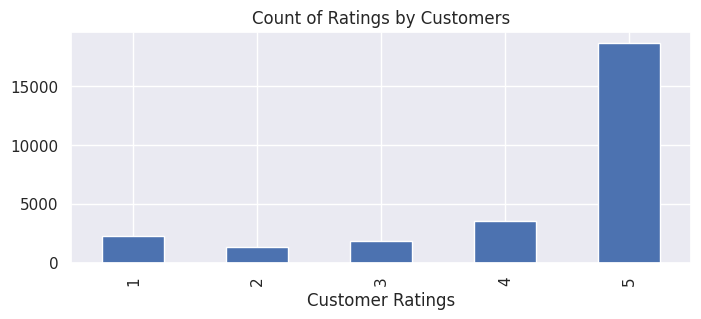

In [ ]:
df4 = df3['review_rating'].value_counts().sort_index() \
.plot(kind='bar',
     title='Count of Ratings by Customers',
     figsize=(8, 3))
df4.set_xlabel('Customer Ratings')
plt.show()

Text(0.5, 1.0, 'Distribution of the different Ratings')

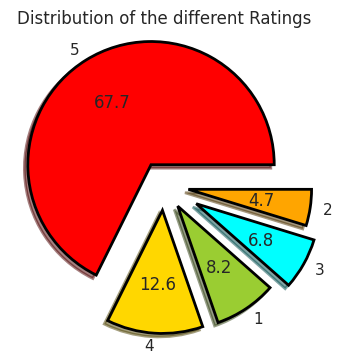

In [ ]:
fig = plt.figure(figsize = (7,4))
colors = ('red', 'gold','yellowgreen','cyan','orange')
wp = {'linewidth': 2, 'edgecolor':'black'}
tags = df3['review_rating'].value_counts()
explode = (0.2,0.2,0.2,0.3,0.2)
tags.plot(kind ='pie', autopct = '%1.1f',colors = colors, shadow = True,
          startangle =0, wedgeprops =wp, explode = explode, label ='')
plt.title('Distribution of the different Ratings')

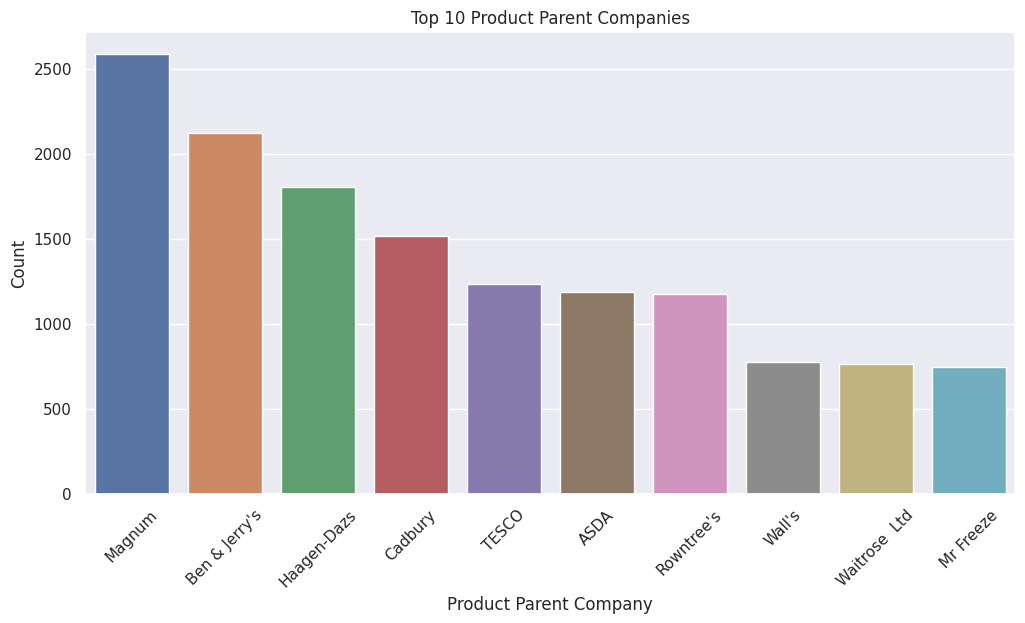

In [ ]:
# distribution of top ten product brand against the review

top_10_companies = df2['Product_Parent_company'].value_counts().nlargest(10)

fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x='Product_Parent_company', data=df2, order=top_10_companies.index, ax=ax)
plt.xticks(rotation=45)
plt.xlabel('Product Parent Company')
plt.ylabel('Count')
plt.title('Top 10 Product Parent Companies')
plt.show()

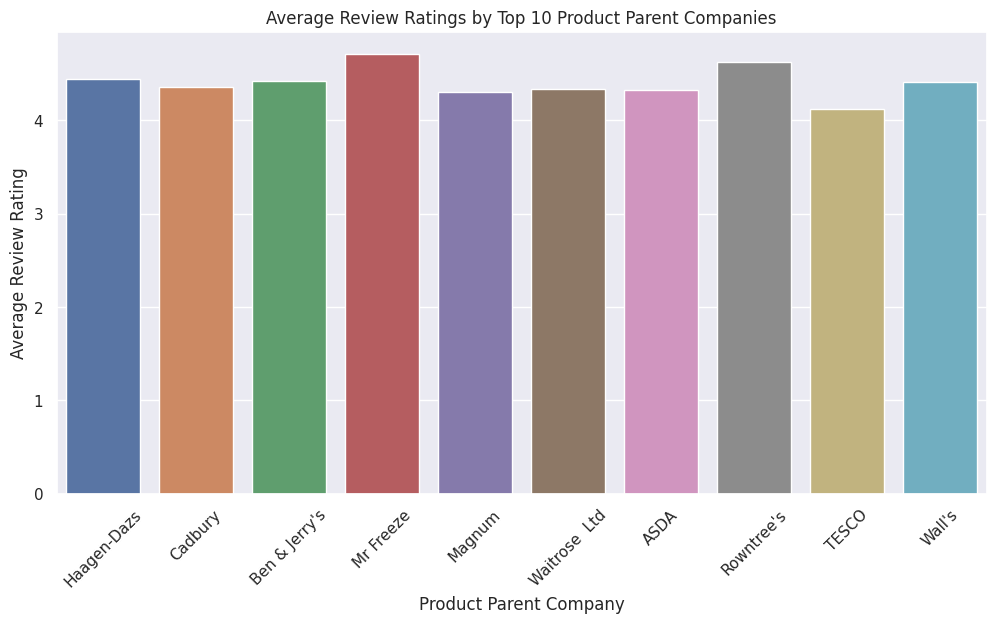

In [ ]:

#  Plotting a graph of average rating by top 10 companies
top_10_companies = df2['Product_Parent_company'].value_counts().nlargest(10)

# Filter the DataFrame to include only the top 10 companies
df_filtered = df2[df2['Product_Parent_company'].isin(top_10_companies.index)]

# Create a bar plot of average review ratings for the top 10 companies
plt.figure(figsize=(12, 6))
sns.barplot(x='Product_Parent_company', y='review_rating', data=df_filtered, ci=None)
plt.xticks(rotation=45)
plt.xlabel('Product Parent Company')
plt.ylabel('Average Review Rating')
plt.title('Average Review Ratings by Top 10 Product Parent Companies')
plt.show()


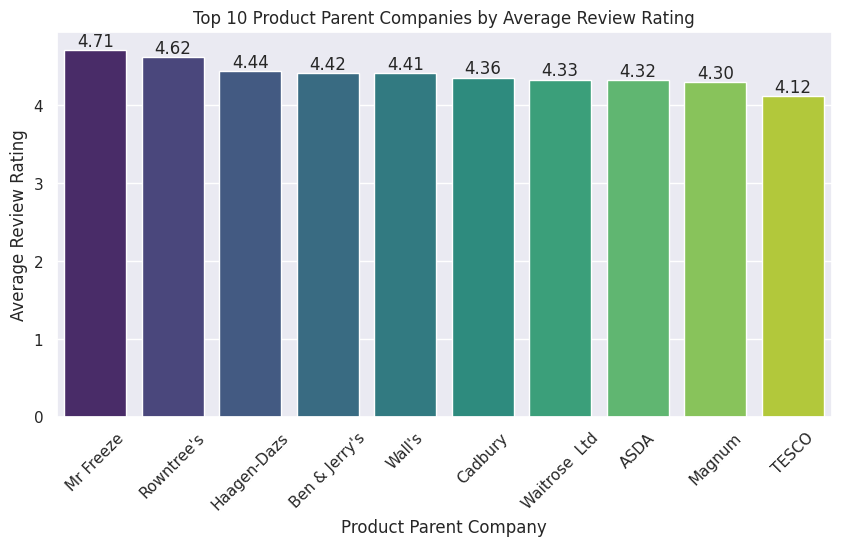

In [ ]:

# Visualizing the average product parent companies
top_10_companies = df2['Product_Parent_company'].value_counts().nlargest(10)

# Filter the DataFrame to include only the top 10 companies
df_top_10 = df2[df2['Product_Parent_company'].isin(top_10_companies.index)]

# Calculate the average review rating for each company
average_ratings = df_top_10.groupby('Product_Parent_company')['review_rating'].mean().sort_values(ascending=False)

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=average_ratings.index, y=average_ratings, ax=ax, palette='viridis')

# Add annotations to the bars
for i, rating in enumerate(average_ratings):
    ax.text(i, rating, f'{rating:.2f}', ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=45)
plt.xlabel('Product Parent Company')
plt.ylabel('Average Review Rating')
plt.title('Top 10 Product Parent Companies by Average Review Rating')
plt.show()


In [ ]:

import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function for text preprocessing
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove punctuation and numbers
    tokens = [word for word in tokens if word.isalpha()]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize the words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Rejoin the tokens into a cleaned text
    cleaned_text = ' '.join(tokens)

    return cleaned_text

# Apply the preprocessing function to the 'Full Text' column
df3['Cleaned_review_body'] = df3['review_body'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df3.head()

,retailer,product_category,product_name,product_price,Product_Parent_company,review_timestamp,review_rating,review_title,review_body,product_tags,product_contents,product_rating,product_reviews_count,Cleaned_review_body
0,amazon.co.uk,Frozen > Ice Cream & Ice Lollies > Ice Cream N...,1L Jersey Gold Ice Cream Mix | Summer | Barbec...,6.45,Ari & Deb,2022-11-13T00:00:00.000Z,5,You need an Ice cream maker to use as it doesn...,Like the creamy taste!!,1L Jersey Gold Ice Cream Mix | Summer | Barbec...,NaN,4.1,9.0,like creamy taste
1,amazon.co.uk,Frozen > Ice Cream & Ice Lollies > Ice Cream B...,"Morrisons Salted Caramel Ice Cream Cones, 4 x ...",1.40,Morrisons,2022-08-09T00:00:00.000Z,5,great taste and cost effective,These have a great taste and are cost effectiv...,"Morrisons Salted Caramel Ice Cream Cones, 4 x ...",NaN,4.6,13.0,great taste cost effective love salty caramel ...
2,amazon.co.uk,Frozen > Ice Cream & Ice Lollies > Ice Cream B...,"Morrisons Salted Caramel Ice Cream Cones, 4 x ...",1.40,Morrisons,2022-08-14T00:00:00.000Z,5,Perfect ice cream,"There’s nothing to dislike, well apart from I ...","Morrisons Salted Caramel Ice Cream Cones, 4 x ...",NaN,4.6,13.0,nothing dislike well apart ordered two pack ni...
3,amazon.co.uk,Frozen > Ice Cream & Ice Lollies > Ice Cream B...,"Morrisons Salted Caramel Ice Cream Cones, 4 x ...",1.40,Morrisons,2022-08-27T00:00:00.000Z,5,Scrumptious,Absolutely scrumptious the only issue is you w...,"Morrisons Salted Caramel Ice Cream Cones, 4 x ...",NaN,4.6,13.0,absolutely scrumptious issue want eat whole box
4,amazon.co.uk,Frozen > Ice Cream & Ice Lollies > Ice Cream B...,"Morrisons Salted Caramel Ice Cream Cones, 4 x ...",1.40,Morrisons,2022-09-13T00:00:00.000Z,3,Could be better,2 of the 4 had melted and refrozen while 2 of ...,"Morrisons Salted Caramel Ice Cream Cones, 4 x ...",NaN,4.6,13.0,melted refrozen original form happen


In [ ]:
# We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

Polarity score on all sentiments

In [ ]:
# Calculate sentiment scores for each review in 'Review_text'
df3['compound'] = [sentiment.polarity_scores(review)['compound'] for review in df3['review_body']]
df3['neg'] = [sentiment.polarity_scores(review)['neg'] for review in df3['review_body']]
df3['neu'] = [sentiment.polarity_scores(review)['neu'] for review in df3['review_body']]
df3['pos'] = [sentiment.polarity_scores(review)['pos'] for review in df3['review_body']]


In [ ]:
df3.head()

,retailer,product_category,product_name,product_price,Product_Parent_company,review_timestamp,review_rating,review_title,review_body,product_tags,product_contents,product_rating,product_reviews_count,Cleaned_review_body,compound,neg,neu,pos
0,amazon.co.uk,Frozen > Ice Cream & Ice Lollies > Ice Cream N...,1L Jersey Gold Ice Cream Mix | Summer | Barbec...,6.45,Ari & Deb,2022-11-13T00:00:00.000Z,5,You need an Ice cream maker to use as it doesn...,Like the creamy taste!!,1L Jersey Gold Ice Cream Mix | Summer | Barbec...,NaN,4.1,9.0,like creamy taste,0.4738,0.000,0.493,0.507
1,amazon.co.uk,Frozen > Ice Cream & Ice Lollies > Ice Cream B...,"Morrisons Salted Caramel Ice Cream Cones, 4 x ...",1.40,Morrisons,2022-08-09T00:00:00.000Z,5,great taste and cost effective,These have a great taste and are cost effectiv...,"Morrisons Salted Caramel Ice Cream Cones, 4 x ...",NaN,4.6,13.0,great taste cost effective love salty caramel ...,0.9349,0.000,0.699,0.301
2,amazon.co.uk,Frozen > Ice Cream & Ice Lollies > Ice Cream B...,"Morrisons Salted Caramel Ice Cream Cones, 4 x ...",1.40,Morrisons,2022-08-14T00:00:00.000Z,5,Perfect ice cream,"There’s nothing to dislike, well apart from I ...","Morrisons Salted Caramel Ice Cream Cones, 4 x ...",NaN,4.6,13.0,nothing dislike well apart ordered two pack ni...,0.8539,0.053,0.647,0.299
3,amazon.co.uk,Frozen > Ice Cream & Ice Lollies > Ice Cream B...,"Morrisons Salted Caramel Ice Cream Cones, 4 x ...",1.40,Morrisons,2022-08-27T00:00:00.000Z,5,Scrumptious,Absolutely scrumptious the only issue is you w...,"Morrisons Salted Caramel Ice Cream Cones, 4 x ...",NaN,4.6,13.0,absolutely scrumptious issue want eat whole box,0.6105,0.000,0.688,0.312
4,amazon.co.uk,Frozen > Ice Cream & Ice Lollies > Ice Cream B...,"Morrisons Salted Caramel Ice Cream Cones, 4 x ...",1.40,Morrisons,2022-09-13T00:00:00.000Z,3,Could be better,2 of the 4 had melted and refrozen while 2 of ...,"Morrisons Salted Caramel Ice Cream Cones, 4 x ...",NaN,4.6,13.0,melted refrozen original form happen,0.3182,0.000,0.874,0.126


In [ ]:
df3[['compound', 'neg', 'neu', 'pos']].describe()

,compound,neg,neu,pos
count,27599.000000,27599.000000,27599.000000,27599.000000
mean,0.550599,0.042073,0.668223,0.289345
std,0.448162,0.085121,0.183396,0.197157
min,-0.978900,0.000000,0.000000,0.000000
25%,0.401900,0.000000,0.568000,0.150000
50%,0.717000,0.000000,0.688000,0.268000
75%,0.883400,0.056000,0.785000,0.404000
max,0.998400,1.000000,1.000000,1.000000


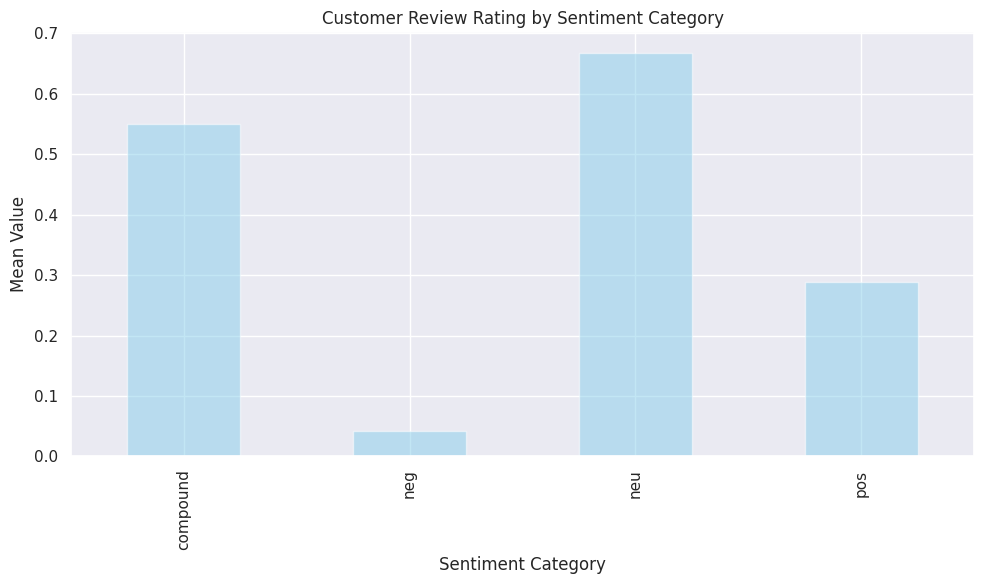

In [ ]:
import matplotlib.pyplot as plt

summary_stats = df3[['compound', 'neg', 'neu', 'pos']].describe()

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
summary_stats.loc['mean'].plot(kind='bar', ax=ax, color='skyblue', alpha=0.5)

# Add labels and title
plt.xlabel('Sentiment Category')
plt.ylabel('Mean Value')
plt.title('Customer Review Rating by Sentiment Category')

# Display the plot
plt.tight_layout()
plt.show()


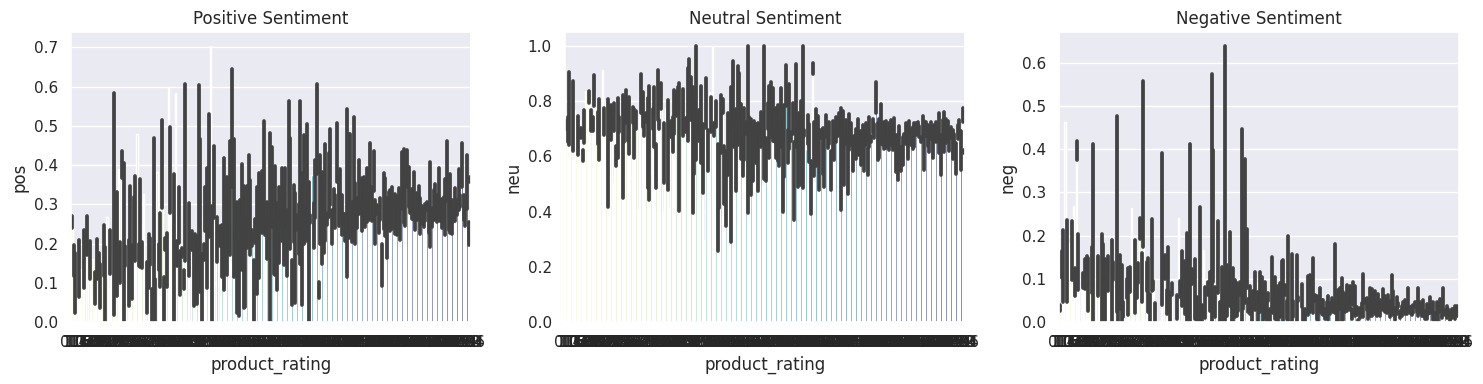

In [ ]:

#  review_data is your DataFrame
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
sns.barplot(data=df3, x='product_rating', y='pos', ax=axs[0], palette='YlGnBu')
sns.barplot(data=df3, x='product_rating', y='neu', ax=axs[1], palette='YlGnBu')
sns.barplot(data=df3, x='product_rating', y='neg', ax=axs[2], palette='YlGnBu')

axs[0].set_title('Positive Sentiment')
axs[1].set_title('Neutral Sentiment')
axs[2].set_title('Negative Sentiment')

plt.tight_layout()
plt.show()


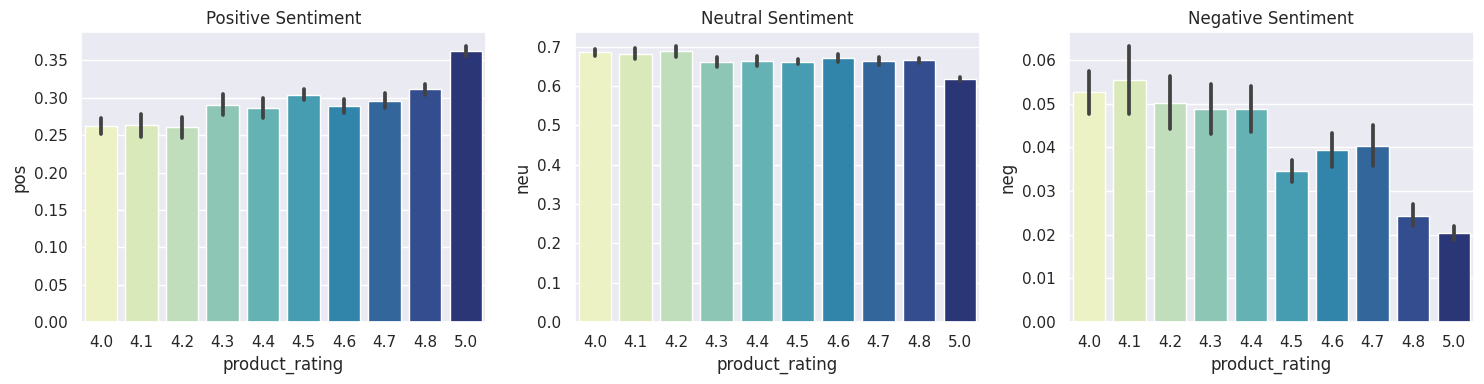

In [ ]:

# df3 is your DataFrame
top_10_ratings = df3['product_rating'].value_counts().nlargest(10)

fig, axs = plt.subplots(1, 3, figsize=(15, 4))
sns.barplot(data=df3[df3['product_rating'].isin(top_10_ratings.index)], x='product_rating', y='pos', ax=axs[0], palette='YlGnBu')
sns.barplot(data=df3[df3['product_rating'].isin(top_10_ratings.index)], x='product_rating', y='neu', ax=axs[1], palette='YlGnBu')
sns.barplot(data=df3[df3['product_rating'].isin(top_10_ratings.index)], x='product_rating', y='neg', ax=axs[2], palette='YlGnBu')

axs[0].set_title('Positive Sentiment')
axs[1].set_title('Neutral Sentiment')
axs[2].set_title('Negative Sentiment')

plt.tight_layout()
plt.show()


In [ ]:
Ben_jerry_brand.head()

,retailer,product_category,product_name,product_price,Product_Parent_company,review_timestamp,review_rating,review_title,review_body,product_tags,product_contents,product_rating,product_reviews_count,Cleaned_review_body,compound,neg,neu,pos
14,amazon.co.uk,Frozen > Ice Cream & Ice Lollies > Ice Cream Tubs,Ben & Jerry's Sundae Dulce De-Lish 427ml,0.00,Ben & Jerry's,2023-05-25T00:00:00.000Z,5,5.0 out of 5 stars,Taste is mmm good,Ben & Jerry's Sundae Dulce De-Lish 427ml,NaN,4.70,1.0,taste mmm good,0.4404,0.000,0.508,0.492
16,amazon.co.uk,Frozen > Ice Cream & Ice Lollies > Ice Cream Tubs,Ben & Jerry's Non-Dairy Cookies on Cookie Doug...,4.99,Ben & Jerry's,2023-06-14T00:00:00.000Z,1,1.0 out of 5 stars,arrived completely melted had to be thrown away,Ben & Jerry's Non-Dairy Cookies on Cookie Doug...,NaN,4.40,12.0,arrived completely melted thrown away,0.0000,0.000,1.000,0.000
232,amazon.co.uk,Frozen > Ice Cream & Ice Lollies > Ice Cream Tubs,Ben & Jerry's Non-Dairy Chocolatey Love A-Fair...,10.61,Ben & Jerry's,2023-03-14T00:00:00.000Z,3,3.0 out of 5 stars,The good- It tastes nice The bad- It has carci...,Ben & Jerry's Non-Dairy Chocolatey Love A-Fair...,NaN,4.30,1.0,taste nice carcinogenic ingredient linked canc...,-0.9738,0.117,0.840,0.043
260,morrisons.com,"Frozen > Ice Cream, Desserts & Fruits > Ice Cr...",Ben & Jerry's Netflix & Chill'D Ice Cream 465ml,3.50,Ben & Jerry's,2022-08-17T00:00:00.000Z,5,yum!,If you like salty and sweet together then you ...,"online supermarket, online groceries, grocery ...","Water, cream (MILK) (21%), condensed skimmed M...",3.70,2.0,like salty sweet together may enjoy husband li...,0.9480,0.100,0.454,0.446
297,sainsburys.co.uk,Summer>Ice cream & desserts,Ben & Jerry's Cookie Dough Vanilla Ice Cream T...,3.75,Ben & Jerry's,2023-02-01T11:38:38.000Z,5,best ice cream ever!,"my favourite, quite expensive but worth the mo...",NaN,"Cream (MILK) (27%), water, condensed skimmed M...",4.61,235.0,favourite quite expensive worth money,0.5154,0.000,0.678,0.322


In [ ]:
Ben_jerry_brand.shape

(2061, 18)

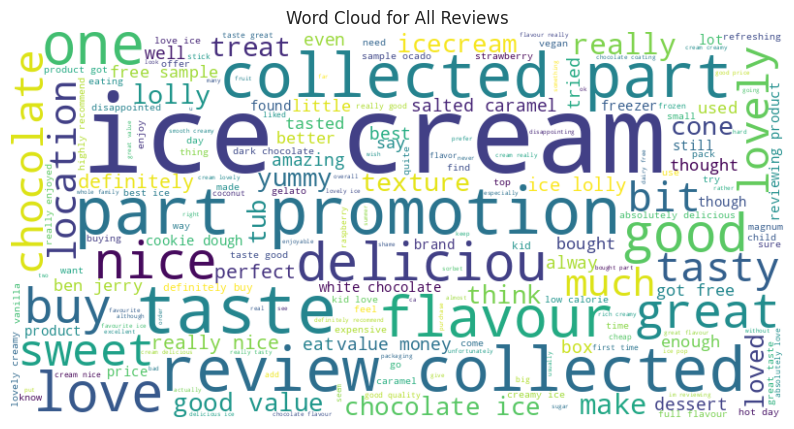

In [ ]:
# General word cloud for the data set
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all the review texts into a single string
all_reviews_text = " ".join(df3['Cleaned_review_body'])

# Generate a Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews_text)

# Plot the Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for All Reviews')
plt.axis('off')
plt.show()


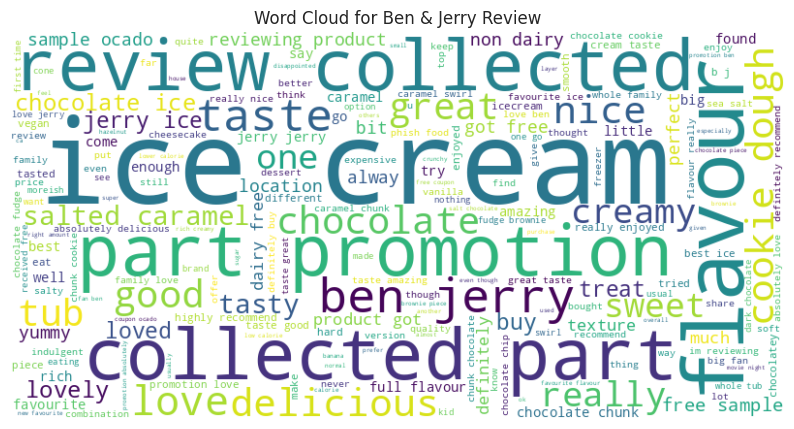

In [ ]:
# generating word cloud for only ben and jerry product

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all the review texts into a single string
Ben_jerry_brand_reviews_text = " ".join(Ben_jerry_brand['Cleaned_review_body'])

# Generate a Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(Ben_jerry_brand_reviews_text)

# Plot the Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Ben & Jerry Review')
plt.axis('off')
plt.show()


In [ ]:
Ben_jerry_brand.shape

(2061, 18)

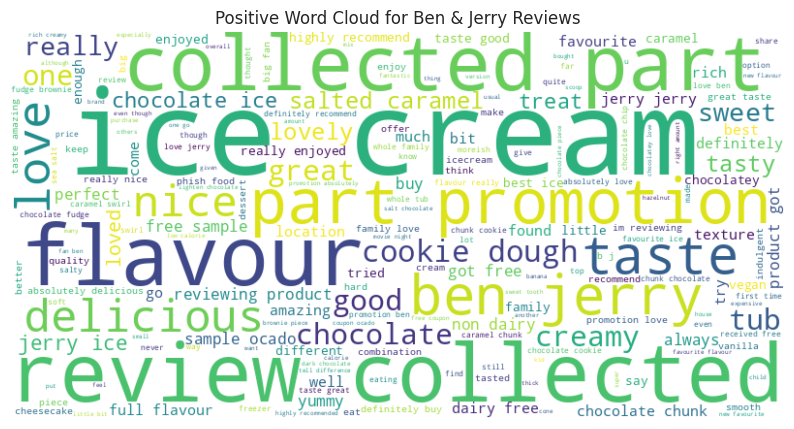

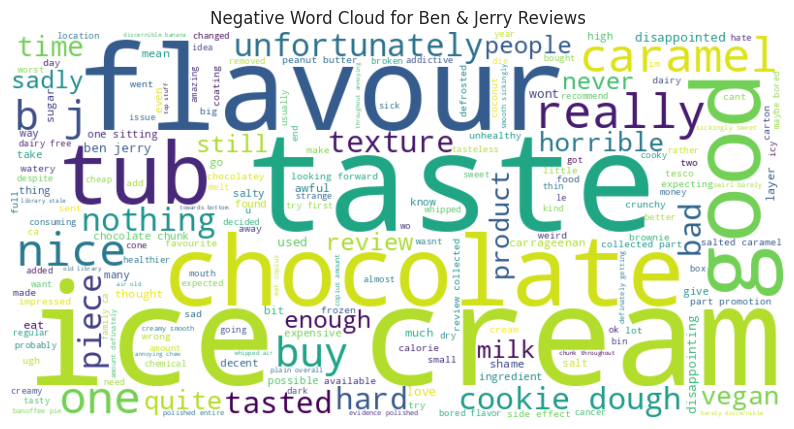

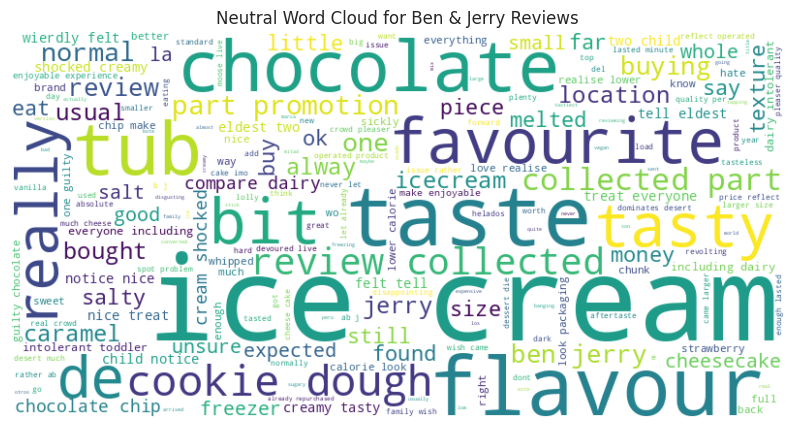

In [ ]:
# Positive, Negative and Neutral Word Cloud of what customers are saying about B & J Projuct

# First Filter reviews based on sentiment scores
positive_reviews = Ben_jerry_brand[Ben_jerry_brand['compound'] > 0.2]
negative_reviews = Ben_jerry_brand[Ben_jerry_brand['compound'] < -0.2]
neutral_reviews = Ben_jerry_brand[(Ben_jerry_brand['compound'] >= -0.2) & (Ben_jerry_brand['compound'] <= 0.2)]

# Combine review texts for each sentiment category
positive_text = " ".join(positive_reviews['Cleaned_review_body'])
negative_text = " ".join(negative_reviews['Cleaned_review_body'])
neutral_text = " ".join(neutral_reviews['Cleaned_review_body'])

# Generate Word Clouds
# Word cloud for positive reviews
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Word cloud for negative reviews
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Word cloud for neutral reviews
neutral_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)

# Plot the Word Clouds
# Positive Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Word Cloud for Ben & Jerry Reviews')
plt.axis('off')
plt.show()

# Negative Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Word Cloud for Ben & Jerry Reviews')
plt.axis('off')
plt.show()

# Neutral Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Neutral Word Cloud for Ben & Jerry Reviews')
plt.axis('off')
plt.show()


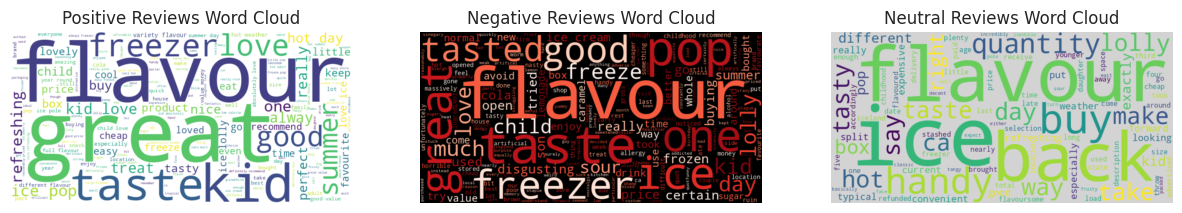

In [ ]:
# Word Cloud for Mr Freeze Ben and Jerry Main Competitor

# Positive Word Cloud
positive_reviews = Mr_Freeze_brand[Mr_Freeze_brand['compound'] > 0]['Cleaned_review_body']
positive_reviews_text = " ".join(positive_reviews)
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews_text)

# Negative Word Cloud
negative_reviews = Mr_Freeze_brand[Mr_Freeze_brand['compound'] < 0]['Cleaned_review_body']
negative_reviews_text = " ".join(negative_reviews)
negative_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_reviews_text)

# Neutral Word Cloud
neutral_reviews = Mr_Freeze_brand[Mr_Freeze_brand['compound'] == 0]['Cleaned_review_body']
neutral_reviews_text = " ".join(neutral_reviews)
neutral_wordcloud = WordCloud(width=800, height=400, background_color='lightgrey').generate(neutral_reviews_text)

# Plot the Word Clouds
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')

plt.subplot(132)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')

plt.subplot(133)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Neutral Reviews Word Cloud')
plt.axis('off')

plt.show()


In [ ]:
# Building a Machine Learning to predict the sentiment for Ben and Jerry Product

# Define a function to map review ratings to sentiment
def map_sentiment(review_rating):
    if review_rating in [4, 5]:
        return "positive"
    elif review_rating == 3:
        return "neutral"
    elif review_rating in [1, 2]:
        return "negative"

# Apply the mapping function to create the 'sentiment' column
Ben_jerry_brand['sentiment'] = Ben_jerry_brand['review_rating'].map(map_sentiment)

Ben_jerry_brand.head()


,retailer,product_category,product_name,product_price,Product_Parent_company,review_timestamp,review_rating,review_title,review_body,product_tags,product_contents,product_rating,product_reviews_count,Cleaned_review_body,compound,neg,neu,pos,sentiment
14,amazon.co.uk,Frozen > Ice Cream & Ice Lollies > Ice Cream Tubs,Ben & Jerry's Sundae Dulce De-Lish 427ml,0.00,Ben & Jerry's,2023-05-25T00:00:00.000Z,5,5.0 out of 5 stars,Taste is mmm good,Ben & Jerry's Sundae Dulce De-Lish 427ml,NaN,4.70,1.0,taste mmm good,0.4404,0.000,0.508,0.492,positive
16,amazon.co.uk,Frozen > Ice Cream & Ice Lollies > Ice Cream Tubs,Ben & Jerry's Non-Dairy Cookies on Cookie Doug...,4.99,Ben & Jerry's,2023-06-14T00:00:00.000Z,1,1.0 out of 5 stars,arrived completely melted had to be thrown away,Ben & Jerry's Non-Dairy Cookies on Cookie Doug...,NaN,4.40,12.0,arrived completely melted thrown away,0.0000,0.000,1.000,0.000,negative
232,amazon.co.uk,Frozen > Ice Cream & Ice Lollies > Ice Cream Tubs,Ben & Jerry's Non-Dairy Chocolatey Love A-Fair...,10.61,Ben & Jerry's,2023-03-14T00:00:00.000Z,3,3.0 out of 5 stars,The good- It tastes nice The bad- It has carci...,Ben & Jerry's Non-Dairy Chocolatey Love A-Fair...,NaN,4.30,1.0,taste nice carcinogenic ingredient linked canc...,-0.9738,0.117,0.840,0.043,neutral
260,morrisons.com,"Frozen > Ice Cream, Desserts & Fruits > Ice Cr...",Ben & Jerry's Netflix & Chill'D Ice Cream 465ml,3.50,Ben & Jerry's,2022-08-17T00:00:00.000Z,5,yum!,If you like salty and sweet together then you ...,"online supermarket, online groceries, grocery ...","Water, cream (MILK) (21%), condensed skimmed M...",3.70,2.0,like salty sweet together may enjoy husband li...,0.9480,0.100,0.454,0.446,positive
297,sainsburys.co.uk,Summer>Ice cream & desserts,Ben & Jerry's Cookie Dough Vanilla Ice Cream T...,3.75,Ben & Jerry's,2023-02-01T11:38:38.000Z,5,best ice cream ever!,"my favourite, quite expensive but worth the mo...",NaN,"Cream (MILK) (27%), water, condensed skimmed M...",4.61,235.0,favourite quite expensive worth money,0.5154,0.000,0.678,0.322,positive


In [ ]:
# Visualise the sentiment Column
# Check class balance
from nltk.sentiment.vader import SentimentIntensityAnalyzer
class_imbalance = Ben_jerry_brand['sentiment'].value_counts()
class_imbalance

positive    1743
negative     164
neutral      154
Name: sentiment, dtype: int64

In [ ]:
#converting strings into numerical datatypes for machine learning.(Text Vectorisation)
#we do this using count vectorisation or TF-IDF( Term Frequency-inverse document Frequency)
#this will transform the text into a forma suitbale for machine learning

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(Ben_jerry_brand['Cleaned_review_body'])

In [ ]:
# using label encoding - encode the categorical labels in the sntiment to numberical values using label encoding for sikit-learn library

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(Ben_jerry_brand['sentiment'])

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
import numpy as np

# Calculate the class distribution
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))

# Print the class distribution
print("Class Distribution Before SMOTE:")
print(class_distribution)


Class Distribution Before SMOTE:
{0: 115, 1: 99, 2: 1228}


In [ ]:
#applying SMOTE
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


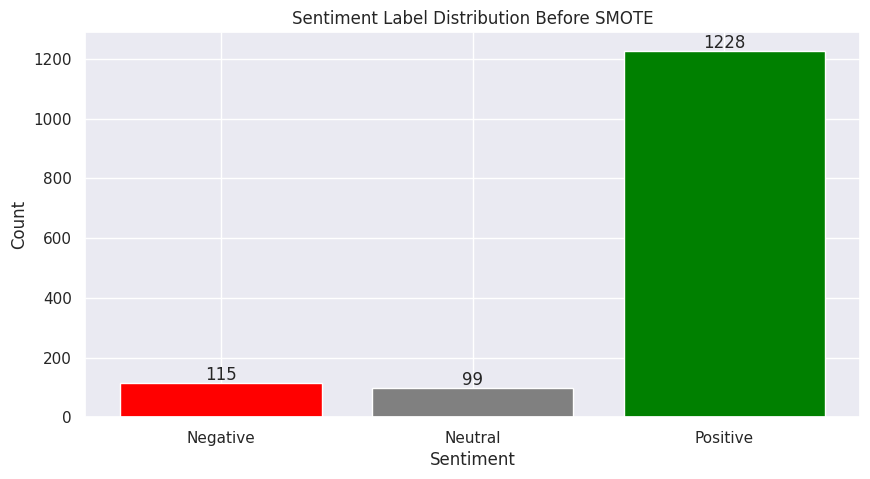

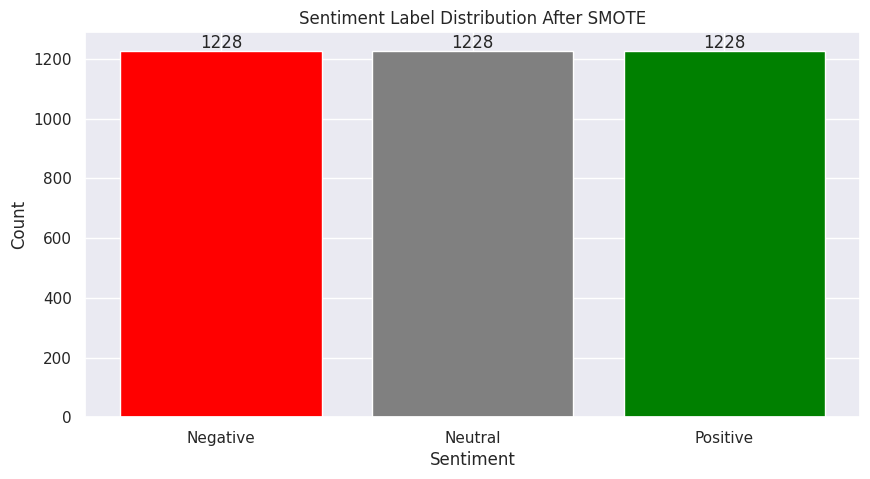

In [ ]:


# Calculate the class distribution before SMOTE
unique_before, counts_before = np.unique(y_train, return_counts=True)

# Calculate the class distribution after SMOTE
unique_after, counts_after = np.unique(y_train_resampled, return_counts=True)

# Create a bar plot for the 'Sentiment' label distribution before SMOTE
plt.figure(figsize=(10, 5))
plt.bar(unique_before, counts_before, color=['red', 'gray', 'green'])
plt.xticks(unique_before, ['Negative', 'Neutral', 'Positive'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Label Distribution Before SMOTE')

# Annotate the bars with the counts
for i, count in enumerate(counts_before):
    plt.text(i, count + 10, str(count), ha='center')

plt.show()

# Create a bar plot for the 'Sentiment' label distribution after SMOTE
plt.figure(figsize=(10, 5))
plt.bar(unique_after, counts_after, color=['red', 'gray', 'green'])
plt.xticks(unique_after, ['Negative', 'Neutral', 'Positive'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Label Distribution After SMOTE')

# Annotate the bars with the counts
for i, count in enumerate(counts_after):
    plt.text(i, count + 10, str(count), ha='center')

plt.show()


In [ ]:
#importing the libraries to train the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb


In [ ]:
# Create and train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(random_state=42)

In [ ]:
# Create and train an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=42)
svm_classifier.fit(X_train_resampled, y_train_resampled)


SVC(C=1, kernel='linear', random_state=42)

In [ ]:
# Create and train an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_classifier.fit(X_train_resampled, y_train_resampled)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
#make predictions
rf_predictions = rf_classifier.predict(X_test)
svm_predictions = svm_classifier.predict(X_test)
xgb_predictions = xgb_classifier.predict(X_test)


In [ ]:
#Evaluating the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Random Forest evaluation
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_classification_report = classification_report(y_test, rf_predictions)

# SVM evaluation
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_classification_report = classification_report(y_test, svm_predictions)

# XGBoost evaluation
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_classification_report = classification_report(y_test, xgb_predictions)

In [ ]:
#Classification report for random forest
from sklearn.metrics import classification_report, confusion_matrix

# Random Forest classification report
rf_classification_report = classification_report(y_test, rf_predictions)
print("Random Forest Classification Report:")
print(rf_classification_report)

# Random Forest confusion matrix
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)
print("Random Forest Confusion Matrix:")
print(rf_confusion_matrix)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.39      0.44        49
           1       0.55      0.47      0.51        55
           2       0.91      0.95      0.93       515

    accuracy                           0.86       619
   macro avg       0.66      0.60      0.63       619
weighted avg       0.85      0.86      0.85       619

Random Forest Confusion Matrix:
[[ 19   8  22]
 [  4  26  25]
 [ 14  13 488]]


In [ ]:
# SVM classification report
svm_classification_report = classification_report(y_test, svm_predictions)
print("SVM Classification Report:")
print(svm_classification_report)

# SVM confusion matrix
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)
print("SVM Confusion Matrix:")
print(svm_confusion_matrix)


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.55      0.52        49
           1       0.56      0.58      0.57        55
           2       0.94      0.93      0.93       515

    accuracy                           0.87       619
   macro avg       0.66      0.69      0.67       619
weighted avg       0.87      0.87      0.87       619

SVM Confusion Matrix:
[[ 27  10  12]
 [  5  32  18]
 [ 23  15 477]]


In [ ]:
# XGBoost classification report
xgb_classification_report = classification_report(y_test, xgb_predictions)
print("XGBoost Classification Report:")
print(xgb_classification_report)

# XGBoost confusion matrix
xgb_confusion_matrix = confusion_matrix(y_test, xgb_predictions)
print("XGBoost Confusion Matrix:")
print(xgb_confusion_matrix)

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.49      0.61        49
           1       0.89      0.44      0.59        55
           2       0.91      0.99      0.95       515

    accuracy                           0.90       619
   macro avg       0.87      0.64      0.71       619
weighted avg       0.90      0.90      0.89       619

XGBoost Confusion Matrix:
[[ 24   2  23]
 [  4  24  27]
 [  2   1 512]]


In [ ]:
#Machine Learning for Naive Bayes
from sklearn.naive_bayes import MultinomialNB
# Create and train a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_resampled, y_train_resampled)


MultinomialNB()

In [ ]:
nb_predictions = nb_classifier.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Naive Bayes classification report
nb_classification_report = classification_report(y_test, nb_predictions)
print("Naive Bayes Classification Report:")
print(nb_classification_report)

# Naive Bayes confusion matrix
nb_confusion_matrix = confusion_matrix(y_test, nb_predictions)
print("Naive Bayes Confusion Matrix:")
print(nb_confusion_matrix)


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.71      0.60        49
           1       0.42      0.45      0.43        55
           2       0.95      0.91      0.93       515

    accuracy                           0.85       619
   macro avg       0.63      0.69      0.66       619
weighted avg       0.87      0.85      0.86       619

Naive Bayes Confusion Matrix:
[[ 35  10   4]
 [ 11  25  19]
 [ 21  25 469]]


In [ ]:
#Comparing the classification report of the 4 algorithms
# Generate classification reports for the four models
rf_classification_report = classification_report(y_test, rf_predictions, output_dict=True)
svm_classification_report = classification_report(y_test, svm_predictions, output_dict=True)
xgb_classification_report = classification_report(y_test, xgb_predictions, output_dict=True)
nb_classification_report = classification_report(y_test, nb_predictions, output_dict=True)

# Create DataFrames from the classification reports
rf_df = pd.DataFrame(rf_classification_report).transpose()
svm_df = pd.DataFrame(svm_classification_report).transpose()
xgb_df = pd.DataFrame(xgb_classification_report).transpose()
nb_df = pd.DataFrame(nb_classification_report).transpose()

# Add model names as a column
rf_df['Model'] = 'Random Forest'
svm_df['Model'] = 'SVM'
xgb_df['Model'] = 'XGBoost'
nb_df['Model'] = 'Naive Bayes'

# Concatenate the DataFrames
classification_reports_df = pd.concat([rf_df, svm_df, xgb_df, nb_df])

# Reset the index and display the final DataFrame
classification_reports_df.reset_index(inplace=True)
classification_reports_df.rename(columns={'index': 'Sentiment'}, inplace=True)

# Print the final DataFrame
print(classification_reports_df)

       Sentiment  precision    recall  f1-score     support          Model
0              0   0.513514  0.387755  0.441860   49.000000  Random Forest
1              1   0.553191  0.472727  0.509804   55.000000  Random Forest
2              2   0.912150  0.947573  0.929524  515.000000  Random Forest
3       accuracy   0.861066  0.861066  0.861066    0.861066  Random Forest
4      macro avg   0.659618  0.602685  0.627063  619.000000  Random Forest
5   weighted avg   0.848699  0.861066  0.853627  619.000000  Random Forest
6              0   0.490909  0.551020  0.519231   49.000000            SVM
7              1   0.561404  0.581818  0.571429   55.000000            SVM
8              2   0.940828  0.926214  0.933464  515.000000            SVM
9       accuracy   0.865913  0.865913  0.865913    0.865913            SVM
10     macro avg   0.664380  0.686351  0.674708  619.000000            SVM
11  weighted avg   0.871500  0.865913  0.868505  619.000000            SVM
12             0   0.8000

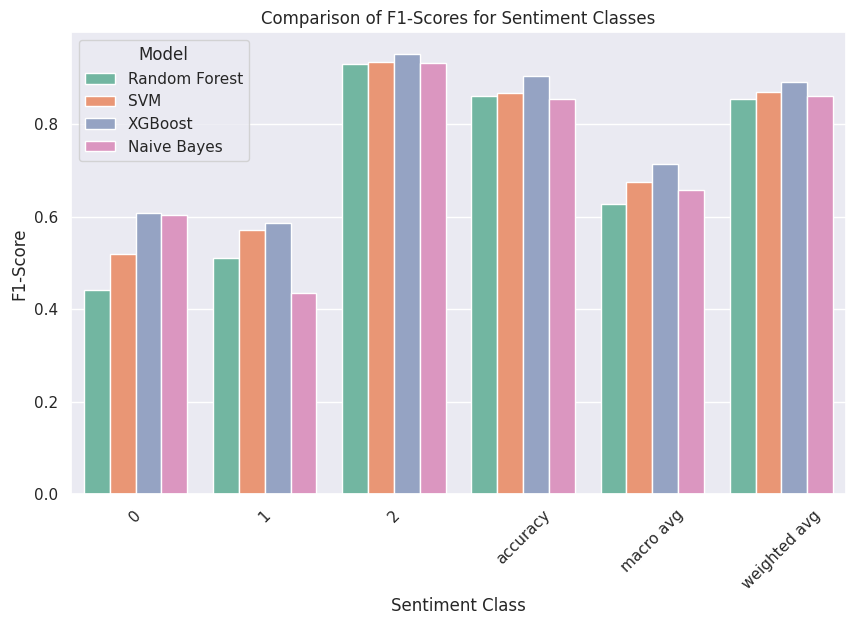

In [ ]:
# Filter the DataFrame to focus on F1-scores (you can choose another metric)
f1_scores_df = classification_reports_df[['Model', 'Sentiment', 'f1-score']]

# Create a bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Sentiment', y='f1-score', hue='Model', data=f1_scores_df, palette='Set2')
plt.title('Comparison of F1-Scores for Sentiment Classes')
plt.xlabel('Sentiment Class')
plt.ylabel('F1-Score')
plt.xticks(rotation=45)
plt.show()


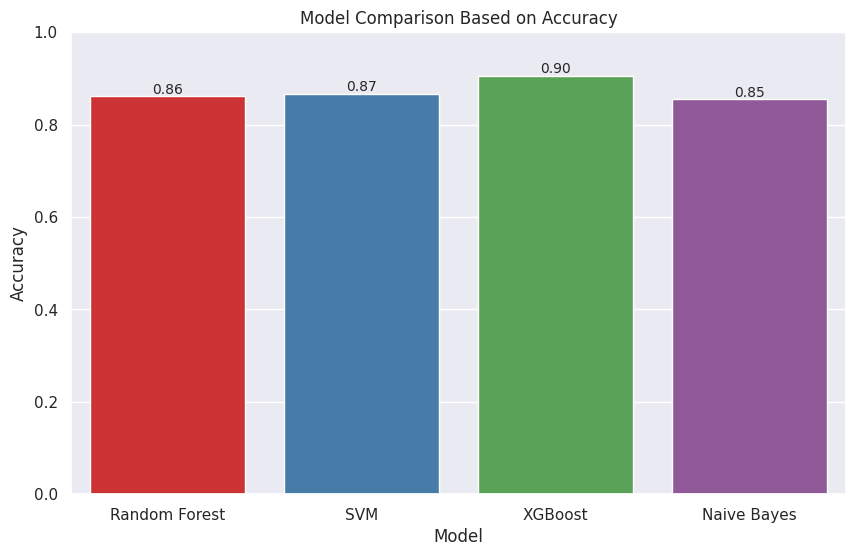

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for each model
accuracy_scores = [accuracy_score(y_test, rf_predictions),
                   accuracy_score(y_test, svm_predictions),
                   accuracy_score(y_test, xgb_predictions),
                   accuracy_score(y_test, nb_predictions)]

# Model names
model_names = ['Random Forest', 'SVM', 'XGBoost', 'Naive Bayes']

# Create a bar chart for accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracy_scores, palette='Set1')
plt.title('Model Comparison Based on Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)  # Set the y-axis range to 0-1 for accuracy

# Annotate the bars with accuracy scores
for i, accuracy in enumerate(accuracy_scores):
    plt.annotate(f'{accuracy:.2f}', (i, accuracy), ha='center', va='bottom', fontsize=10)

plt.show()

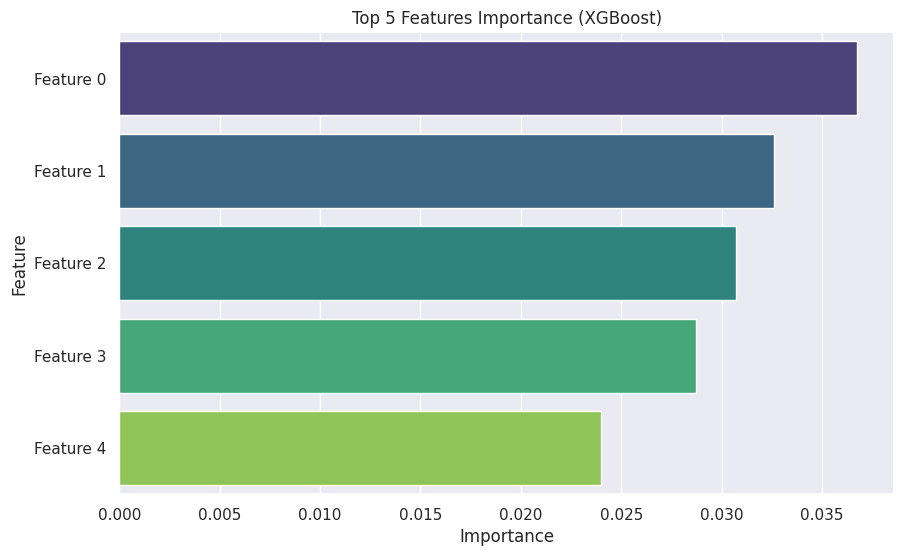

In [ ]:
# Top 10 features to build the machine

# Get feature importances from the trained XGBoost classifier
feature_importances = xgb_classifier.feature_importances_

# Use the indices of the top N features based on importance
top_n = 5  # Change this to the number of top features you want
top_feature_indices = np.argsort(feature_importances)[::-1][:top_n]

# Get the importance values for the top features
top_feature_importances = feature_importances[top_feature_indices]

# You may not have access to feature names in a sparse matrix, so you can use the indices
# Create a list of feature names (assuming your original data is a DataFrame)
# feature_names = X_train.columns.tolist()  # Replace with the actual feature names
feature_names = [f'Feature {i}' for i in range(len(top_feature_indices))]

# Create a DataFrame to organize the top feature importances
top_feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': top_feature_importances})

# Plot the top N features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_feature_df, palette='viridis')
plt.title(f'Top {top_n} Features Importance (XGBoost)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
#Hyper parameter tuning on the XGBoost
#we using grid searchcv from sklearn

from sklearn.model_selection import GridSearchCV

In [ ]:
#Perform hyperp parameter tuning
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model to the data to find the best hyperparameters
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [ ]:
# Create an XGBoost classifier with the best hyperparameters
best_xgb_classifier = xgb.XGBClassifier(**best_params, random_state=42)

# Train the model with the best hyperparameters
best_xgb_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
best_xgb_predictions = best_xgb_classifier.predict(X_test)

# Generate a classification report
from sklearn.metrics import classification_report

classification_report_xgb = classification_report(y_test, best_xgb_predictions)
print("XGBoost Classification Report:")
print(classification_report_xgb)


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.39      0.54        49
           1       0.80      0.36      0.50        55
           2       0.90      0.99      0.94       515

    accuracy                           0.89       619
   macro avg       0.85      0.58      0.66       619
weighted avg       0.88      0.89      0.87       619

